### This notebook is written by Jiawen Liang for the AccFin PhD workshop: Python for Data Analysis in Nov 2022. Please do not circulate without permission.

# Statistical models

## topics

- statistical hypothesis t tests

- normality tests

- portfolio optimization

- linear regression





In [1]:
# Please install statsmodel at the first time.
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## t-test
- to test whether the means of two independent samples are significantly different.

- Hypothesis:

H0: the means of the samples are equal.

H1: the means of the samples are unequal.

In [42]:
# Exampls
# ttest_ind: calculate the T-test for the means of two independent samples of scores.
from scipy.stats import ttest_ind
d1 = [0.843, 2.49, 1.394, -0.394, -0.349, -1.135, -1.149]
d2 = [1.142, -0.850, -0.942, 0.395, -1.395, -1.502, -1.425]

stat, p = ttest_ind(d1, d2)
print("t-statistics%.3f"% stat, "p%.3f"% p)

if p > 0.05:
    print('Probably the same distribution')
    print("cannot reject H0")
else:
    print('Probably different distributions')
    print("reject H0")

t-statistics1.384 p0.192
Probably the same distribution
cannot reject H0


## Normaility tests
- to validate the assumption that data are normally distributed.
- important for financial models, such as MV, CAPM.
- e.g. check whether returns are normally distributed.

In [5]:
price_df = pd.read_csv("data/stock_prices.csv")
price_df.head()

,date,AAPL,GE,AMD,WMT,BAC,T,XOM,RRC,BBY,PFE,JPM
0,29/12/1989,0.117203,0.352438,3.9375,3.486070,1.752478,2.365775,1.766756,NaN,0.166287,0.110818,1.827968
1,02/01/1990,0.123853,0.364733,4.1250,3.660858,1.766686,2.398184,1.766756,NaN,0.173216,0.113209,1.835617
2,03/01/1990,0.124684,0.364050,4.0000,3.660858,1.780897,2.356516,1.749088,NaN,0.194001,0.113608,1.896803
3,04/01/1990,0.125100,0.362001,3.9375,3.641439,1.743005,2.403821,1.731422,NaN,0.190537,0.115402,1.904452
4,05/01/1990,0.125516,0.358586,3.8125,3.602595,1.705114,2.287973,1.722587,NaN,0.190537,0.114405,1.912100


In [6]:
price_df.set_index("date")

,AAPL,GE,AMD,WMT,BAC,T,XOM,RRC,BBY,PFE,JPM
date,,,,,,,,,,,
29/12/1989,0.117203,0.352438,3.9375,3.486070,1.752478,2.365775,1.766756,NaN,0.166287,0.110818,1.827968
02/01/1990,0.123853,0.364733,4.1250,3.660858,1.766686,2.398184,1.766756,NaN,0.173216,0.113209,1.835617
03/01/1990,0.124684,0.364050,4.0000,3.660858,1.780897,2.356516,1.749088,NaN,0.194001,0.113608,1.896803
04/01/1990,0.125100,0.362001,3.9375,3.641439,1.743005,2.403821,1.731422,NaN,0.190537,0.115402,1.904452
05/01/1990,0.125516,0.358586,3.8125,3.602595,1.705114,2.287973,1.722587,NaN,0.190537,0.114405,1.912100
...,...,...,...,...,...,...,...,...,...,...,...
05/04/2018,172.800003,13.430000,10.0200,87.809998,30.320000,35.632843,76.019997,14.52,72.120003,35.730000,111.879997
06/04/2018,168.380005,13.060000,9.6100,86.690002,29.629999,35.130001,74.870003,13.97,70.489998,35.169998,109.089996
09/04/2018,170.050003,12.830000,9.5300,86.279999,29.870001,35.169998,74.870003,13.93,69.820000,35.459999,110.400002


In [7]:
log_return = np.log(price_df.AAPL) - np.log(price_df.AAPL.shift(1))

Text(0, 0.5, 'sample quantiles')

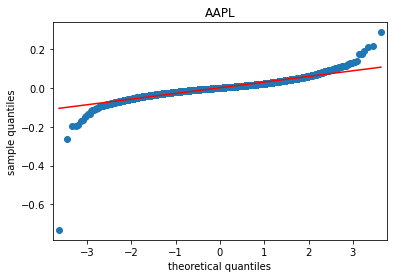

In [6]:
# normality test
# quantiles
sm.qqplot(log_return.dropna(), line='s')
plt.title('AAPL')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

The sample quantile values do not lie on a straight line, indicating “non-normality.”!

## Portfolio optimization
- use library: pypfopt
- a very useful and open-source library to do portfolio optimization
- include expected returns, covariance matrix, mean-variance optimization, sharpe ratio, efficient frontier...

In [3]:
pip install PyPortfolioOpt

  Using cached pyportfolioopt-1.5.3-py3-none-any.whl (61 kB)
     |████████████████████████████████| 880 kB 240 kB/s eta 0:00:01
     |████████████████████████████████| 18.1 MB 341 kB/s eta 0:00:01    |█████████▏                      | 5.2 MB 389 kB/s eta 0:00:34
     |████████████████████████████████| 88 kB 561 kB/s eta 0:00:01
     |████████████████████████████████| 249 kB 640 kB/s eta 0:00:01
     |████████████████████████████████| 11.4 MB 514 kB/s eta 0:00:01
     |████████████████████████████████| 97 kB 387 kB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 1.5 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install yfinance


     |████████████████████████████████| 62 kB 1.9 MB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt import EfficientFrontier

tickers = ["MSFT", "AMZN", "KO", "MA", "COST", 
           "LUV", "XOM", "PFE", "JPM", "UNH"] 

ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  10 of 10 completed


In [6]:
ohlc.columns

MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'COST'),
            ('Adj Close',  'JPM'),
            ('Adj Close',   'KO'),
            ('Adj Close',  'LUV'),
            ('Adj Close',   'MA'),
            ('Adj Close', 'MSFT'),
            ('Adj Close',  'PFE'),
            ('Adj Close',  'UNH'),
            ('Adj Close',  'XOM'),
            (    'Close', 'AMZN'),
            (    'Close', 'COST'),
            (    'Close',  'JPM'),
            (    'Close',   'KO'),
            (    'Close',  'LUV'),
            (    'Close',   'MA'),
            (    'Close', 'MSFT'),
            (    'Close',  'PFE'),
            (    'Close',  'UNH'),
            (    'Close',  'XOM'),
            (     'High', 'AMZN'),
            (     'High', 'COST'),
            (     'High',  'JPM'),
            (     'High',   'KO'),
            (     'High',  'LUV'),
            (     'High',   'MA'),
            (     'High', 'MSFT'),
            (     'High',  'PFE'),
            (     'H

In [7]:
price_df2 = ohlc["Adj Close"].dropna(how="all")
price_df2.head()

,AMZN,COST,JPM,KO,LUV,MA,MSFT,PFE,UNH,XOM
Date,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,0.050016,NaN,NaN,NaN,NaN,NaN,0.099852
1962-01-03,NaN,NaN,NaN,0.048902,NaN,NaN,NaN,NaN,NaN,0.101335
1962-01-04,NaN,NaN,NaN,0.049273,NaN,NaN,NaN,NaN,NaN,0.101582
1962-01-05,NaN,NaN,NaN,0.048159,NaN,NaN,NaN,NaN,NaN,0.099357
1962-01-08,NaN,NaN,NaN,0.047664,NaN,NaN,NaN,NaN,NaN,0.099110


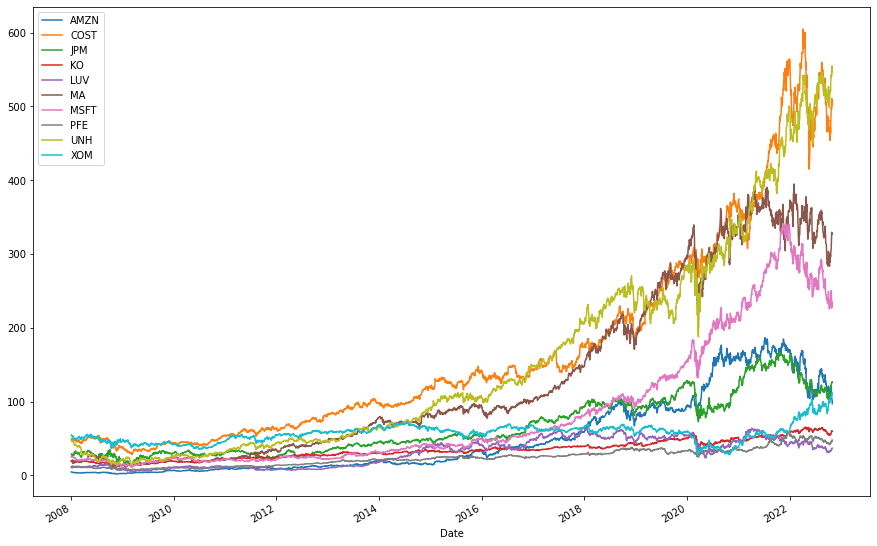

In [9]:
price_df2[price_df2.index >= "2008-01-01"].plot(figsize=(15,10));

In [10]:
mu = expected_returns.mean_historical_return(price_df2)
mu

AMZN    0.311679
COST    0.122124
JPM     0.117188
KO      0.123639
LUV     0.133761
MA      0.302792
MSFT    0.251796
PFE     0.117208
UNH     0.248279
XOM     0.122438
dtype: float64

In [12]:
S = risk_models.risk_matrix(price_df2)
S

,AMZN,COST,JPM,KO,LUV,MA,MSFT,PFE,UNH,XOM
AMZN,0.330745,0.048032,0.066274,0.020215,0.048054,0.057057,0.072811,0.031222,0.034893,0.026806
COST,0.048032,0.101407,0.038562,0.021403,0.031193,0.032459,0.037511,0.025421,0.027545,0.020346
JPM,0.066274,0.038562,0.128130,0.027796,0.049198,0.069529,0.049308,0.032780,0.038640,0.033169
KO,0.020215,0.021403,0.027796,0.053580,0.022967,0.026282,0.027806,0.026054,0.023021,0.020630
LUV,0.048054,0.031193,0.049198,0.022967,0.138665,0.048773,0.037008,0.025941,0.032465,0.023463
MA,0.057057,0.032459,0.069529,0.026282,0.048773,0.118198,0.049757,0.032246,0.042754,0.041753
MSFT,0.072811,0.037511,0.049308,0.027806,0.037008,0.049757,0.114613,0.030674,0.034065,0.029015
PFE,0.031222,0.025421,0.032780,0.026054,0.025941,0.032246,0.030674,0.076161,0.028325,0.022980
UNH,0.034893,0.027545,0.038640,0.023021,0.032465,0.042754,0.034065,0.028325,0.161684,0.022460
XOM,0.026806,0.020346,0.033169,0.020630,0.023463,0.041753,0.029015,0.022980,0.022460,0.052675


In [13]:
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AMZN', 0.00917),
             ('COST', 0.11424),
             ('JPM', -0.00751),
             ('KO', 0.3048),
             ('LUV', 0.06498),
             ('MA', -0.04839),
             ('MSFT', 0.01993),
             ('PFE', 0.13541),
             ('UNH', 0.05526),
             ('XOM', 0.35211)])

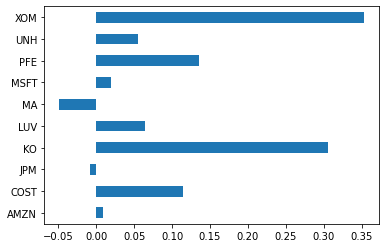

In [14]:
pd.Series(weights).plot.barh();

## Linear regression

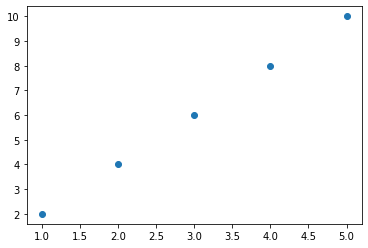

In [15]:
X = [[1],[2],[3],[4],[5]] # independent variables: 2 dimensional form 
Y = [2,4,6,8,10]
plt.scatter(X,Y) # scatter diagram
plt.show()

In [16]:
# Scikit-Learn
ln_reg = LinearRegression()
ln_reg.fit(X,Y) # use fit() to build the linear regression model

LinearRegression()

In [17]:
y = ln_reg.predict([[1.5]])
y

array([3.])

In [18]:
y = ln_reg.predict([[1.5], [2.4],[3.4]])
y

array([3. , 4.8, 6.8])

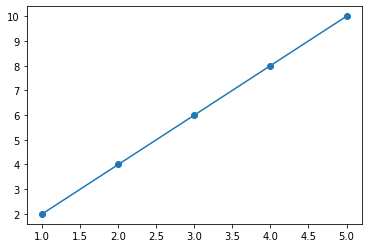

In [19]:
plt.scatter(X,Y)
plt.plot(X, ln_reg.predict(X))
plt.show()

In [20]:
# coefficient
str(ln_reg.coef_[0])

'2.0'

In [21]:
# intercept
str(ln_reg.intercept_)

'0.0'

In [26]:
# so, the predicted linear model is Y = 2X

Please import the dataset in "data/linear_regression" folder.
in the trainning dataset: x can best estimate y.

This dataset is downloaded from Kaggle: https://www.kaggle.com/datasets/andonians/random-linear-regression

In [22]:
train_df = pd.read_csv("data/linear_regression/train.csv")
train_df.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [23]:
train_df.isnull().sum()

x    0
y    1
dtype: int64

In [24]:
train_df.dropna(inplace=True)

In [26]:
x1 = train_df.x.values.reshape(-1, 1) #-1: it is an unknown dimension and we want numpy to figure it out
y1 = train_df.y.values

In [31]:
x1

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [27]:
reg1 = LinearRegression()
reg1.fit(x1,y1)

LinearRegression()

In [28]:
yhat1 = reg1.predict(x1)
reg_sc = reg1.score(x1,y1)

In [29]:
# Return the coefficient of determination of the prediction.
print("score:", reg_sc)

score: 0.9907015319025518


In [30]:
reg1.coef_[0]

1.000656381856304

In [31]:
reg1.intercept_

-0.10726546430097272

In [32]:
test_df = pd.read_csv("data/linear_regression/test.csv")
test_df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [33]:
x2 = test_df.x.values.reshape(-1, 1)
y2 = test_df.y.values

In [34]:
yhat2 = reg1.predict(x2)

In [35]:
yhat2

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

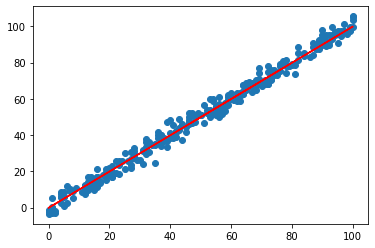

In [36]:
plt.scatter(x=test_df.x, y=test_df.y)
plt.plot(x2, yhat2, c='r')

In [37]:
# ols performance
# R-square, t-test, p value
import statsmodels.api as sm
est = sm.OLS(y1, x1).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.955e+05
Date:                Tue, 01 Nov 2022   Prob (F-statistic):                        0.00
Time:                        16:34:31   Log-Likelihood:                         -1712.9
No. Observations:                 699   AIC:                                      3428.
Df Residuals:                     698   BIC:                                      3432.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Exercise: 
1. create a list of independent variable X and dependent variable Y.
2. try linear regression
3. predict y with some x values by your regression model
4. find the coefficient and intercept

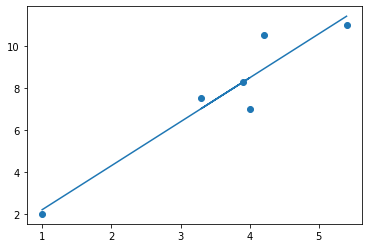

[3.24850374]
coefficient: 2.094451371571072
intercept: 0.1068266832917697


In [62]:
# Q1
# X = np.array([[1,4],[3.3],[3.9],[4.2],[5.4]]).reshape(-1, 1)
X = np.array([1,4,3.3,3.9,4.2,5.4]).reshape(-1, 1)
# X1 = str(X).reshape(-1,1) # independent variables: 2 dimensional form 
Y = [2,7,7.5,8.3,10.5,11]

# Q2
l_reg = LinearRegression()
l_reg.fit(X,Y)

plt.scatter(X,Y)
plt.plot(X, l_reg.predict(X))
plt.show()

# Q3
y_hat = l_reg.predict([[1.5]])
print(y_hat)

# Q4
print("coefficient:",reg.coef_[0])

print("intercept:",reg.intercept_)